In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def conv_layer(input, size_in, size_out):
    w = tf.Variable(tf.truncated_normal([5, 5, size_in, size_out], stddev=0.1))
    b = tf.Variable(tf.constant(0.1, shape=[size_out]))
    conv = tf.nn.conv2d(input, w, strides=[1, 1, 1, 1], padding="SAME")
    act = tf.nn.relu(conv + b)
    return tf.nn.max_pool(act, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")

In [4]:
def fc_layer(input, size_in, size_out):
    w = tf.Variable(tf.truncated_normal([size_in, size_out], stddev=0.1))
    b = tf.Variable(tf.constant(0.1, shape=[size_out]))
    act = tf.matmul(input, w) + b
    return act

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
train_size = 4000
x_train = x_train[0: train_size]
y_train = y_train[0: train_size]

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')
x_train /= 255
x_test /= 255

In [8]:
x = tf.placeholder(tf.float32, shape=[train_size, 784])
x_image = tf.reshape(x, [train_size, 28, 28, 1])

y = tf.placeholder(tf.int64, shape=[train_size])

In [9]:
conv1 = conv_layer(x_image, 1, 32)
conv_out = conv_layer(conv1, 32, 64)

In [10]:
flattened = tf.reshape(conv_out, [train_size, 7 * 7 * 64])

In [11]:
fc1 = fc_layer(flattened, 7 * 7 * 64, 1024)
relu = tf.nn.relu(fc1)

In [12]:
logits = fc_layer(relu, 1024, 10)
softmax = tf.nn.softmax(logits)

In [13]:
matches = tf.equal(tf.argmax(softmax, 1), y)
acc = tf.reduce_mean(tf.cast(matches, tf.float32))

In [14]:
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y))

In [15]:
train_op = tf.train.AdamOptimizer(0.001).minimize(loss)

In [16]:
init = tf.global_variables_initializer()

In [17]:
saver = tf.train.Saver()

In [18]:
with tf.Session() as sess:
    sess.run(init)
    
    losses = []
    accuracies = []
    epochs = 25
    
    for i in range(epochs):
        loss_, _, acc_ = sess.run([loss, train_op, acc], feed_dict={x: x_train.reshape(train_size, 784), y: y_train})
        losses.append(loss_)
        accuracies.append(acc_)
        print("Epoch No: " + str(i + 1) + " of " + str(epochs))
        print("Loss: " + str(loss_) + " Accuracy: " + str(acc_))
        print("\n")
        
    saver.save(sess, "./log/CNN_TF_without_batches.ckpt")

Epoch No: 1 of 25
Loss: 6.99432 Accuracy: 0.067


Epoch No: 2 of 25
Loss: 10.499946 Accuracy: 0.15675


Epoch No: 3 of 25
Loss: 13.418692 Accuracy: 0.156


Epoch No: 4 of 25
Loss: 13.965055 Accuracy: 0.17625


Epoch No: 5 of 25
Loss: 10.364614 Accuracy: 0.17925


Epoch No: 6 of 25
Loss: 7.2473583 Accuracy: 0.22


Epoch No: 7 of 25
Loss: 5.1600723 Accuracy: 0.235


Epoch No: 8 of 25
Loss: 3.9770806 Accuracy: 0.238


Epoch No: 9 of 25
Loss: 2.5045686 Accuracy: 0.364


Epoch No: 10 of 25
Loss: 1.7188823 Accuracy: 0.49775


Epoch No: 11 of 25
Loss: 1.5297875 Accuracy: 0.4925


Epoch No: 12 of 25
Loss: 1.4954963 Accuracy: 0.479


Epoch No: 13 of 25
Loss: 1.5053948 Accuracy: 0.48425


Epoch No: 14 of 25
Loss: 1.4893423 Accuracy: 0.47625


Epoch No: 15 of 25
Loss: 1.3793554 Accuracy: 0.51275


Epoch No: 16 of 25
Loss: 1.2061155 Accuracy: 0.6205


Epoch No: 17 of 25
Loss: 1.0297024 Accuracy: 0.73825


Epoch No: 18 of 25
Loss: 0.88865054 Accuracy: 0.79525


Epoch No: 19 of 25
Loss: 0.78903383 A

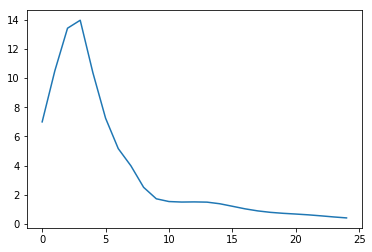

In [19]:
plt.plot(losses)
plt.show()

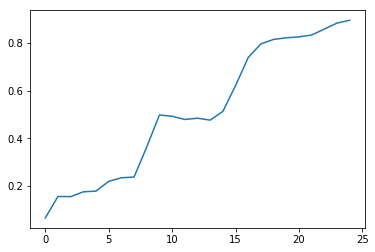

In [20]:
plt.plot(accuracies)
plt.show()

In [21]:
x_test = x_test[0: train_size]

In [22]:
with tf.Session() as sess:
    saver.restore(sess, "./log/CNN_TF_without_batches.ckpt")
    
    y_pred = sess.run(softmax, feed_dict={x: x_test.reshape(train_size, 784)})
    for i in range(20):
        print(str(np.argmax(y_pred[i])) + " - " + str(y_test[i]))

INFO:tensorflow:Restoring parameters from ./log/CNN_TF_without_batches.ckpt
7 - 7
2 - 2
1 - 1
0 - 0
4 - 4
1 - 1
4 - 4
9 - 9
5 - 5
9 - 9
0 - 0
6 - 6
9 - 9
0 - 0
1 - 1
5 - 5
9 - 9
7 - 7
2 - 3
4 - 4
